<a href="https://colab.research.google.com/github/riyaprakash7827-del/ML-practice/blob/main/%20Linear_regression_ML_day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Classification Problem
- Binary Classification
- Output/y/target: Binary class
    - 0/1
    - True/False
    - Yes/No
    - Ex: India vs Aust: Win:
    - Cancer: Yes, No
    - Student perfomance : Placement predict: placed : yes | NO
    - Insurance : Buy : yes | NO
    - Employee: Attrition: yes | NO
    - Customer churn: JIO: yes | NO
    - NO: Churn rate: regression

- Multiclass Classification
- Disease Prediction: cancer, TV, etc
- more than Two classes
- Flower Species: Photo: Image: Rose, Lily, Sunflower Etc
- Audi, BMW, Maruti Etc
- Image Processing: Tesla: Car, Truck, Cycle,

In [ ]:
# Linear regression vs classification regression model

In [ ]:
import numpy as np

data = np.random.random(50)
data

array([0.11692619, 0.42656165, 0.05683285, 0.21807654, 0.25796291,
       0.00370258, 0.19894284, 0.83608152, 0.04640496, 0.49808407,
       0.13953945, 0.95268708, 0.415037  , 0.95036379, 0.05574888,
       0.58297692, 0.00126283, 0.57180134, 0.37673825, 0.17978805,
       0.88597659, 0.48184485, 0.5033216 , 0.00238488, 0.61352521,
       0.56229027, 0.34728408, 0.63125964, 0.43459592, 0.17974765,
       0.875171  , 0.6818459 , 0.36814514, 0.26940352, 0.12290896,
       0.66629511, 0.75258177, 0.81022072, 0.08207967, 0.90030017,
       0.91293358, 0.7073706 , 0.39101808, 0.93430499, 0.4145623 ,
       0.32163157, 0.26148229, 0.7561769 , 0.36287039, 0.04553378])

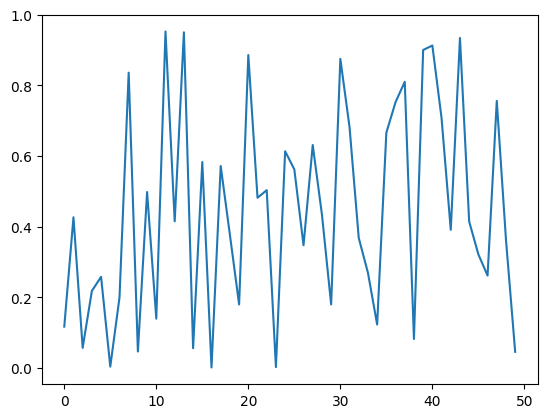

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.show()

In [ ]:
# s-Curve: Sigmoid Cure: with the help sigmoid function



In [ ]:
x = data.copy()

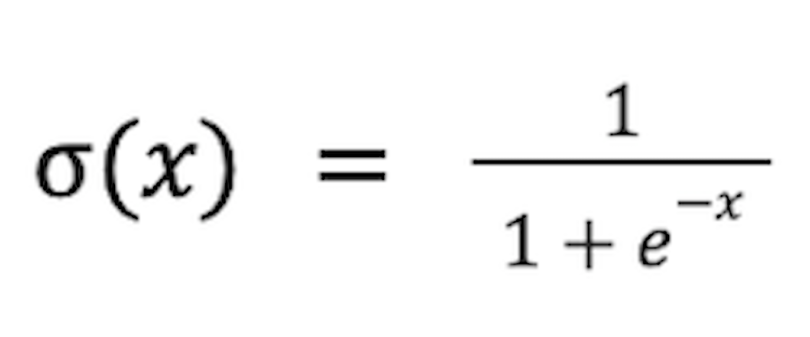

In [ ]:
# e: universal constant: Log value: complex power equantion e value
#  important mathematical constant approximately equal to 2.71828: 2.71


def sigmoid_func(x):
  '''It will convert linear data to sigmoid value'''
  return 1/(1 + 2.71**(-x))

In [ ]:
sigmoid_x = sigmoid_func(x)

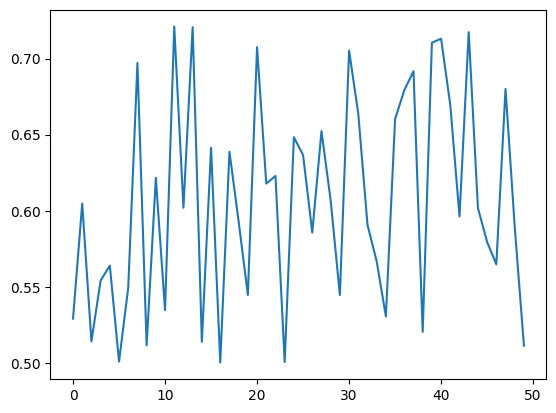

In [ ]:
plt.plot(sigmoid_x)
plt.show()

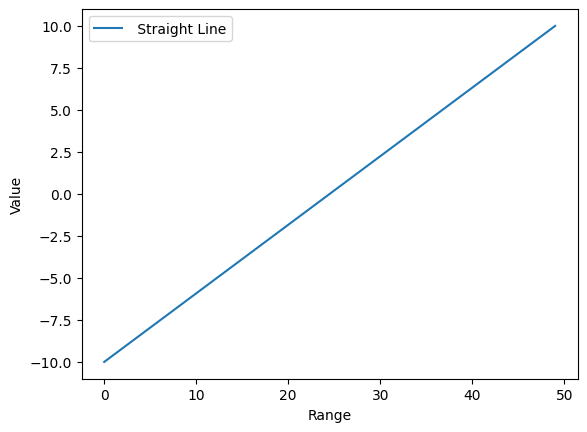

In [ ]:
# Linear spaced data
new_x = np.linspace(-10,10,50)
plt.xlabel('Range')
plt.ylabel('Value')
plt.plot(new_x, label =' Straight Line')
plt.legend()
plt.show()

In [ ]:
sigmoid_x_new = sigmoid_func(new_x)

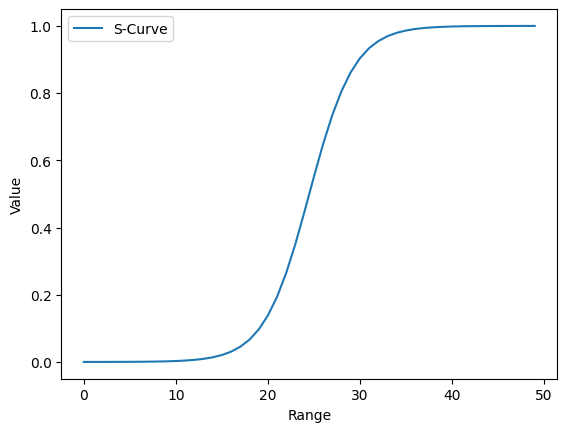

In [ ]:
plt.plot(sigmoid_x_new, label = 'S-Curve')
plt.xlabel('Range')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# That is the reason, we use sigmoid func for binary classification problems
# Output: range(0 to 1)
# Exact : zero or 1 : no
min(sigmoid_x_new)

np.float64(4.680440879668812e-05)

In [ ]:
0.000046

max(sigmoid_x_new)

np.float64(0.9999531955912034)

In [ ]:
# Logistic Regression

# Step 1: Load Module

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
import os

In [ ]:
df = pd.read_csv('/content/insurance.csv')

In [ ]:
df.head()

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
0,22,Male,28000,580,0,Single,0
1,23,Female,30000,590,0,Single,0
2,24,Male,31000,600,0,Single,0
3,25,Female,32000,605,1,Single,0
4,26,Male,33000,610,0,Single,0


In [ ]:
# ML Only works with numerical data:
# because we have textual data as well: we need to convert this into numerical one
# and this method is called feature engineering

In [ ]:
df.shape

(85, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               85 non-null     int64 
 1   gender            85 non-null     object
 2   salary            85 non-null     int64 
 3   credit_score      85 non-null     int64 
 4   previous_claim    85 non-null     int64 
 5   marital_status    85 non-null     object
 6   insurance_bought  85 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.8+ KB


In [ ]:
# Object representL: textual data: Problem for ML

In [ ]:
df.corr(numeric_only=True)

,age,salary,credit_score,previous_claim,insurance_bought
age,1.000000,0.995648,0.997087,-0.072472,0.757525
salary,0.995648,1.000000,0.998899,-0.076699,0.715942
credit_score,0.997087,0.998899,1.000000,-0.079440,0.726551
previous_claim,-0.072472,-0.076699,-0.079440,1.000000,-0.064398
insurance_bought,0.757525,0.715942,0.726551,-0.064398,1.000000


# Setp 2 : Feature Engineering

In [ ]:
df.columns

Index(['age', 'gender', 'salary', 'credit_score', 'previous_claim',
       'marital_status', 'insurance_bought'],
      dtype='object')

In [ ]:
text_cols = list(df.select_dtypes('object').columns)
text_cols

['gender', 'marital_status']

In [ ]:
for i in text_cols:
  print(f'Analysis for {i}')
  display(df[i].value_counts().head(10))

  print('--------')

Analysis for gender


,count
gender,
Male,43
Female,42


--------
Analysis for marital_status


,count
marital_status,
Married,59
Single,26


--------


In [ ]:
df['gender'].unique()

array([0, 1])

In [ ]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

In [ ]:
df.sample()

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
41,43,1,64000,750,1,1,1


In [ ]:
df['marital_status'].unique()

array([0, 1])

In [ ]:
df['marital_status'] = df['marital_status'].replace({'Single':0,'Married':1})

In [ ]:
df['insurance_bought'].unique()

array([0, 1])

In [ ]:
df['insurance_bought'] = df['insurance_bought'].replace({'no':0,'yes':1})

In [ ]:
df.sample()

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
52,35,0,47500,680,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               85 non-null     int64
 1   gender            85 non-null     int64
 2   salary            85 non-null     int64
 3   credit_score      85 non-null     int64
 4   previous_claim    85 non-null     int64
 5   marital_status    85 non-null     int64
 6   insurance_bought  85 non-null     int64
dtypes: int64(7)
memory usage: 4.8 KB


In [ ]:
df.corr().round(2)

,age,gender,salary,credit_score,previous_claim,marital_status,insurance_bought
age,1.00,0.01,1.00,1.00,-0.07,0.77,0.76
gender,0.01,1.00,0.01,0.01,0.08,-0.01,-0.03
salary,1.00,0.01,1.00,1.00,-0.08,0.74,0.72
credit_score,1.00,0.01,1.00,1.00,-0.08,0.75,0.73
previous_claim,-0.07,0.08,-0.08,-0.08,1.00,-0.01,-0.06
marital_status,0.77,-0.01,0.74,0.75,-0.01,1.00,0.92
insurance_bought,0.76,-0.03,0.72,0.73,-0.06,0.92,1.00


# Step 3: Split Data

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.shape

(85, 6)

In [ ]:
y.shape

(85,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train.shape

(68, 6)

In [ ]:
X_test.shape

(17, 6)

In [ ]:
# Problem is of Binary classification

# Step 4: Problem Solving using Linear regression

In [ ]:
model_linear = LinearRegression()
model_linear.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Score
model_linear.score(X_test,y_test)

0.9616404097917117

In [ ]:
y_pred = model_linear.predict(X_test)

In [ ]:
y_test

,insurance_bought
78,1
0,0
68,1
22,1
12,0
82,1
10,0
18,0
4,0
66,1


In [ ]:
y_pred

array([ 0.99841812,  0.04481565,  1.06746069,  1.10442781, -0.07068932,
        1.0274251 , -0.16167447,  0.1277524 ,  0.20212118,  1.01399211,
        1.04716817,  0.91126909,  0.89919641,  1.00620511,  0.92711781,
        1.05522989,  1.00158818])

In [ ]:
# sigmoid func: linear data convert to Sigmoid value

final_y_pred = [round(i) for i in sigmoid_func(y_pred)]
final_y_pred

[1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Step 5: Problem Solving using Logistic regression

In [ ]:
model_logisic = LogisticRegression()

model_logisic.fit(X_train,y_train)

LogisticRegression()

In [ ]:
score = model_logisic.score(X_test,y_test)
score

1.0

In [ ]:
# 1 = 100% Accurate

In [ ]:
y_pred_final = model_logisic.predict(X_test)

In [ ]:
y_pred_final

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_test.values

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_train.sample()

,age,gender,salary,credit_score,previous_claim,marital_status
44,46,0,70000,780,1,1


In [ ]:
import warnings
warnings.filterwarnings('ignore')
age  = float(input('Enter your age: '))
income = float(input('Enter your income: '))
gender = float(input('Enter gender {0:male, 1: female}: '))
marital_status = float(input('Enter marital Status {0:single,1:married}: '))
credit_score = float(input('Enter your Credit Score: '))
claim = float(input('Enter previous claim (0,1): '))

temp_data = [[age,income,gender,marital_status,credit_score,claim]]

ans = model_logisic.predict(temp_data)[0]
ans = 'NO' if ans== 0 else 'Yes'
print(ans)

Enter your age: 34
Enter your income: 25000
Enter gender {0:male, 1: female}: 0
Enter marital Status {0:single,1:married}: 0
Enter your Credit Score: 700
Enter previous claim (0,1): 1
NO


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred_final)
print(cm)

[[ 5  0]
 [ 0 12]]


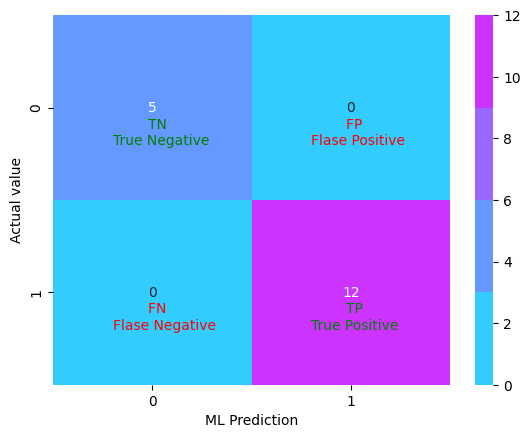

In [ ]:
sns.heatmap(cm, annot = True, cmap= sns.color_palette('cool',4))
plt.xlabel('ML Prediction')
plt.ylabel('Actual value')
plt.annotate(text = '        TN\nTrue Negative', xy = (0.3,0.7), color = 'green')
plt.annotate(text = '        TP\nTrue Positive', xy = (1.3,1.7), color = 'green')
plt.annotate(text = '        FP\nFlase Positive', xy = (1.3,0.7), color = 'red')
plt.annotate(text = '        FN\nFlase Negative', xy = (0.3,1.7), color = 'red')

plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
print(f'True Negative (TN): {tn}')
print(f'False Positive (FP): {fp}')
print(f'False Negative (FN): {fn}')
print(f'True Positive (TP): {tp}')


True Negative (TN): 5
False Positive (FP): 0
False Negative (FN): 0
True Positive (TP): 12


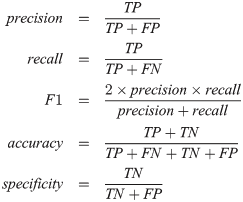

In [ ]:
accuracy_score = (tp + tn)/(tp + tn + fp + fn)
print('Accuracy Score: ',accuracy_score)

Accuracy Score:  1.0


In [ ]:
model_logisic.score(X_test,y_test)

1.0

In [ ]:
precision_score = (tp)/(tp + fp)
print('precision Score: ',precision_score)


precision Score:  1.0


In [ ]:
recall_score = (tp)/(tp+fn)
print('recall Score: ',recall_score)


recall Score:  1.0


In [ ]:
specificity_score = (tn)/(tn+fp)
print('specificity Score: ',specificity_score)


specificity Score:  1.0


In [ ]:
f1_score = 2*(precision_score*recall_score)/(precision_score+recall_score)
print('F1 Score: ',f1_score)

F1 Score:  1.0


In [ ]:
# classification report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        12

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

